## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 50.7ms	remaining: 50.7s
1:	learn: 0.9301086	total: 54.3ms	remaining: 27.1s
2:	learn: 0.9005637	total: 57.4ms	remaining: 19.1s
3:	learn: 0.8720983	total: 60.6ms	remaining: 15.1s
4:	learn: 0.8467410	total: 63.7ms	remaining: 12.7s
5:	learn: 0.8226672	total: 66.6ms	remaining: 11s
6:	learn: 0.7994702	total: 69.5ms	remaining: 9.86s
7:	learn: 0.7784272	total: 73ms	remaining: 9.05s
8:	learn: 0.7602192	total: 76.3ms	remaining: 8.4s
9:	learn: 0.7412421	total: 79.3ms	remaining: 7.85s
10:	learn: 0.7247930	total: 82.5ms	remaining: 7.42s
11:	learn: 0.7089951	total: 85.7ms	remaining: 7.05s
12:	learn: 0.6951345	total: 88.6ms	remaining: 6.73s
13:	learn: 0.6809276	total: 91.7ms	remaining: 6.46s
14:	learn: 0.6692630	total: 94.9ms	remaining: 6.23s
15:	learn: 0.6588323	total: 98ms	remaining: 6.03s
16:	learn: 0.6472700	total: 101ms	remaining: 5.84s
17:	learn: 0.6379982	total: 104ms	remaining: 5.67s
18:	learn: 0.6294674	total: 107ms	remaining: 5.52s
19

41:	learn: 0.5170220	total: 176ms	remaining: 4.01s
42:	learn: 0.5141148	total: 179ms	remaining: 3.99s
43:	learn: 0.5116444	total: 182ms	remaining: 3.96s
44:	learn: 0.5100547	total: 186ms	remaining: 3.94s
45:	learn: 0.5069096	total: 189ms	remaining: 3.91s
46:	learn: 0.5051685	total: 192ms	remaining: 3.88s
47:	learn: 0.5033968	total: 195ms	remaining: 3.87s
48:	learn: 0.5012433	total: 198ms	remaining: 3.85s
49:	learn: 0.4986132	total: 201ms	remaining: 3.82s
50:	learn: 0.4968022	total: 204ms	remaining: 3.8s
51:	learn: 0.4951632	total: 208ms	remaining: 3.78s
52:	learn: 0.4928924	total: 211ms	remaining: 3.76s
53:	learn: 0.4917272	total: 214ms	remaining: 3.75s
54:	learn: 0.4895079	total: 217ms	remaining: 3.74s
55:	learn: 0.4881884	total: 220ms	remaining: 3.72s
56:	learn: 0.4861566	total: 224ms	remaining: 3.7s
57:	learn: 0.4850201	total: 227ms	remaining: 3.69s
58:	learn: 0.4840055	total: 230ms	remaining: 3.67s
59:	learn: 0.4824455	total: 234ms	remaining: 3.66s
60:	learn: 0.4809744	total: 237ms

102:	learn: 0.4475445	total: 370ms	remaining: 3.23s
103:	learn: 0.4466014	total: 374ms	remaining: 3.22s
104:	learn: 0.4461730	total: 377ms	remaining: 3.21s
105:	learn: 0.4457259	total: 380ms	remaining: 3.2s
106:	learn: 0.4451085	total: 383ms	remaining: 3.2s
107:	learn: 0.4447909	total: 386ms	remaining: 3.19s
108:	learn: 0.4440936	total: 389ms	remaining: 3.18s
109:	learn: 0.4435519	total: 392ms	remaining: 3.17s
110:	learn: 0.4431075	total: 395ms	remaining: 3.17s
111:	learn: 0.4425498	total: 399ms	remaining: 3.16s
112:	learn: 0.4419106	total: 402ms	remaining: 3.15s
113:	learn: 0.4414425	total: 405ms	remaining: 3.15s
114:	learn: 0.4407446	total: 408ms	remaining: 3.14s
115:	learn: 0.4402011	total: 411ms	remaining: 3.13s
116:	learn: 0.4398559	total: 414ms	remaining: 3.12s
117:	learn: 0.4392990	total: 417ms	remaining: 3.12s
118:	learn: 0.4389153	total: 420ms	remaining: 3.11s
119:	learn: 0.4383331	total: 423ms	remaining: 3.1s
120:	learn: 0.4378136	total: 426ms	remaining: 3.09s
121:	learn: 0.4

164:	learn: 0.4184572	total: 559ms	remaining: 2.83s
165:	learn: 0.4180680	total: 562ms	remaining: 2.82s
166:	learn: 0.4176884	total: 566ms	remaining: 2.82s
167:	learn: 0.4173026	total: 569ms	remaining: 2.82s
168:	learn: 0.4170486	total: 572ms	remaining: 2.81s
169:	learn: 0.4165960	total: 575ms	remaining: 2.81s
170:	learn: 0.4161870	total: 578ms	remaining: 2.8s
171:	learn: 0.4156228	total: 581ms	remaining: 2.8s
172:	learn: 0.4153041	total: 584ms	remaining: 2.79s
173:	learn: 0.4148857	total: 587ms	remaining: 2.79s
174:	learn: 0.4144190	total: 590ms	remaining: 2.78s
175:	learn: 0.4140875	total: 593ms	remaining: 2.78s
176:	learn: 0.4136755	total: 596ms	remaining: 2.77s
177:	learn: 0.4133860	total: 599ms	remaining: 2.77s
178:	learn: 0.4129780	total: 602ms	remaining: 2.76s
179:	learn: 0.4122907	total: 605ms	remaining: 2.76s
180:	learn: 0.4119188	total: 608ms	remaining: 2.75s
181:	learn: 0.4115412	total: 611ms	remaining: 2.75s
182:	learn: 0.4112620	total: 614ms	remaining: 2.74s
183:	learn: 0.

222:	learn: 0.3978579	total: 757ms	remaining: 2.64s
223:	learn: 0.3976462	total: 760ms	remaining: 2.63s
224:	learn: 0.3973704	total: 763ms	remaining: 2.63s
225:	learn: 0.3971729	total: 766ms	remaining: 2.62s
226:	learn: 0.3968841	total: 768ms	remaining: 2.62s
227:	learn: 0.3965787	total: 771ms	remaining: 2.61s
228:	learn: 0.3963073	total: 774ms	remaining: 2.61s
229:	learn: 0.3960925	total: 777ms	remaining: 2.6s
230:	learn: 0.3957018	total: 780ms	remaining: 2.6s
231:	learn: 0.3954162	total: 783ms	remaining: 2.59s
232:	learn: 0.3951665	total: 787ms	remaining: 2.59s
233:	learn: 0.3949269	total: 789ms	remaining: 2.58s
234:	learn: 0.3945894	total: 792ms	remaining: 2.58s
235:	learn: 0.3944181	total: 795ms	remaining: 2.58s
236:	learn: 0.3941497	total: 799ms	remaining: 2.57s
237:	learn: 0.3939819	total: 802ms	remaining: 2.57s
238:	learn: 0.3938322	total: 804ms	remaining: 2.56s
239:	learn: 0.3935463	total: 808ms	remaining: 2.56s
240:	learn: 0.3933166	total: 811ms	remaining: 2.55s
241:	learn: 0.

285:	learn: 0.3826742	total: 948ms	remaining: 2.37s
286:	learn: 0.3824534	total: 951ms	remaining: 2.36s
287:	learn: 0.3821767	total: 954ms	remaining: 2.36s
288:	learn: 0.3819748	total: 957ms	remaining: 2.35s
289:	learn: 0.3817667	total: 960ms	remaining: 2.35s
290:	learn: 0.3815253	total: 963ms	remaining: 2.35s
291:	learn: 0.3813529	total: 966ms	remaining: 2.34s
292:	learn: 0.3812172	total: 970ms	remaining: 2.34s
293:	learn: 0.3809978	total: 973ms	remaining: 2.34s
294:	learn: 0.3807825	total: 976ms	remaining: 2.33s
295:	learn: 0.3805940	total: 979ms	remaining: 2.33s
296:	learn: 0.3801959	total: 982ms	remaining: 2.32s
297:	learn: 0.3799439	total: 986ms	remaining: 2.32s
298:	learn: 0.3797228	total: 989ms	remaining: 2.32s
299:	learn: 0.3795554	total: 992ms	remaining: 2.31s
300:	learn: 0.3793733	total: 995ms	remaining: 2.31s
301:	learn: 0.3791607	total: 998ms	remaining: 2.31s
302:	learn: 0.3789297	total: 1s	remaining: 2.3s
303:	learn: 0.3787482	total: 1s	remaining: 2.3s
304:	learn: 0.378652

347:	learn: 0.3705958	total: 1.14s	remaining: 2.13s
348:	learn: 0.3703798	total: 1.14s	remaining: 2.13s
349:	learn: 0.3701923	total: 1.15s	remaining: 2.13s
350:	learn: 0.3700067	total: 1.15s	remaining: 2.12s
351:	learn: 0.3698930	total: 1.15s	remaining: 2.12s
352:	learn: 0.3697314	total: 1.15s	remaining: 2.12s
353:	learn: 0.3695617	total: 1.16s	remaining: 2.11s
354:	learn: 0.3694397	total: 1.16s	remaining: 2.11s
355:	learn: 0.3692589	total: 1.16s	remaining: 2.1s
356:	learn: 0.3691107	total: 1.17s	remaining: 2.1s
357:	learn: 0.3689645	total: 1.17s	remaining: 2.1s
358:	learn: 0.3687886	total: 1.17s	remaining: 2.1s
359:	learn: 0.3686485	total: 1.18s	remaining: 2.09s
360:	learn: 0.3685749	total: 1.18s	remaining: 2.09s
361:	learn: 0.3683909	total: 1.18s	remaining: 2.08s
362:	learn: 0.3682710	total: 1.19s	remaining: 2.08s
363:	learn: 0.3681254	total: 1.19s	remaining: 2.08s
364:	learn: 0.3679761	total: 1.19s	remaining: 2.07s
365:	learn: 0.3677932	total: 1.2s	remaining: 2.07s
366:	learn: 0.367

409:	learn: 0.3608193	total: 1.33s	remaining: 1.91s
410:	learn: 0.3604920	total: 1.33s	remaining: 1.91s
411:	learn: 0.3603038	total: 1.33s	remaining: 1.9s
412:	learn: 0.3602055	total: 1.34s	remaining: 1.9s
413:	learn: 0.3599094	total: 1.34s	remaining: 1.9s
414:	learn: 0.3597887	total: 1.34s	remaining: 1.89s
415:	learn: 0.3595791	total: 1.35s	remaining: 1.89s
416:	learn: 0.3594487	total: 1.35s	remaining: 1.89s
417:	learn: 0.3592759	total: 1.35s	remaining: 1.88s
418:	learn: 0.3591088	total: 1.35s	remaining: 1.88s
419:	learn: 0.3589470	total: 1.36s	remaining: 1.88s
420:	learn: 0.3587972	total: 1.36s	remaining: 1.87s
421:	learn: 0.3586831	total: 1.36s	remaining: 1.87s
422:	learn: 0.3585620	total: 1.37s	remaining: 1.87s
423:	learn: 0.3584427	total: 1.37s	remaining: 1.86s
424:	learn: 0.3583044	total: 1.37s	remaining: 1.86s
425:	learn: 0.3581698	total: 1.38s	remaining: 1.85s
426:	learn: 0.3580461	total: 1.38s	remaining: 1.85s
427:	learn: 0.3579182	total: 1.38s	remaining: 1.85s
428:	learn: 0.3

472:	learn: 0.3516593	total: 1.52s	remaining: 1.69s
473:	learn: 0.3514906	total: 1.52s	remaining: 1.69s
474:	learn: 0.3513843	total: 1.53s	remaining: 1.69s
475:	learn: 0.3512406	total: 1.53s	remaining: 1.68s
476:	learn: 0.3510044	total: 1.53s	remaining: 1.68s
477:	learn: 0.3509121	total: 1.53s	remaining: 1.68s
478:	learn: 0.3507270	total: 1.54s	remaining: 1.67s
479:	learn: 0.3506003	total: 1.54s	remaining: 1.67s
480:	learn: 0.3505111	total: 1.54s	remaining: 1.67s
481:	learn: 0.3503906	total: 1.55s	remaining: 1.66s
482:	learn: 0.3501522	total: 1.55s	remaining: 1.66s
483:	learn: 0.3500494	total: 1.55s	remaining: 1.66s
484:	learn: 0.3498921	total: 1.56s	remaining: 1.65s
485:	learn: 0.3497143	total: 1.56s	remaining: 1.65s
486:	learn: 0.3496172	total: 1.56s	remaining: 1.65s
487:	learn: 0.3494609	total: 1.56s	remaining: 1.64s
488:	learn: 0.3493200	total: 1.57s	remaining: 1.64s
489:	learn: 0.3491550	total: 1.57s	remaining: 1.64s
490:	learn: 0.3490323	total: 1.57s	remaining: 1.63s
491:	learn: 

532:	learn: 0.3437049	total: 1.71s	remaining: 1.5s
533:	learn: 0.3435053	total: 1.71s	remaining: 1.5s
534:	learn: 0.3433236	total: 1.72s	remaining: 1.49s
535:	learn: 0.3432219	total: 1.72s	remaining: 1.49s
536:	learn: 0.3431615	total: 1.72s	remaining: 1.49s
537:	learn: 0.3430198	total: 1.73s	remaining: 1.48s
538:	learn: 0.3429422	total: 1.73s	remaining: 1.48s
539:	learn: 0.3428024	total: 1.73s	remaining: 1.48s
540:	learn: 0.3426641	total: 1.74s	remaining: 1.47s
541:	learn: 0.3425885	total: 1.74s	remaining: 1.47s
542:	learn: 0.3424695	total: 1.74s	remaining: 1.47s
543:	learn: 0.3423997	total: 1.75s	remaining: 1.46s
544:	learn: 0.3422315	total: 1.75s	remaining: 1.46s
545:	learn: 0.3421242	total: 1.75s	remaining: 1.46s
546:	learn: 0.3419673	total: 1.75s	remaining: 1.45s
547:	learn: 0.3418121	total: 1.76s	remaining: 1.45s
548:	learn: 0.3416228	total: 1.76s	remaining: 1.45s
549:	learn: 0.3414331	total: 1.76s	remaining: 1.44s
550:	learn: 0.3413090	total: 1.77s	remaining: 1.44s
551:	learn: 0.

595:	learn: 0.3367491	total: 1.9s	remaining: 1.29s
596:	learn: 0.3366496	total: 1.91s	remaining: 1.29s
597:	learn: 0.3365561	total: 1.91s	remaining: 1.28s
598:	learn: 0.3364801	total: 1.91s	remaining: 1.28s
599:	learn: 0.3363937	total: 1.92s	remaining: 1.28s
600:	learn: 0.3363054	total: 1.92s	remaining: 1.27s
601:	learn: 0.3361892	total: 1.92s	remaining: 1.27s
602:	learn: 0.3360683	total: 1.92s	remaining: 1.27s
603:	learn: 0.3359807	total: 1.93s	remaining: 1.26s
604:	learn: 0.3359096	total: 1.93s	remaining: 1.26s
605:	learn: 0.3358268	total: 1.93s	remaining: 1.26s
606:	learn: 0.3356597	total: 1.94s	remaining: 1.25s
607:	learn: 0.3355448	total: 1.94s	remaining: 1.25s
608:	learn: 0.3354512	total: 1.94s	remaining: 1.25s
609:	learn: 0.3353398	total: 1.95s	remaining: 1.24s
610:	learn: 0.3352669	total: 1.95s	remaining: 1.24s
611:	learn: 0.3351716	total: 1.95s	remaining: 1.24s
612:	learn: 0.3351155	total: 1.96s	remaining: 1.23s
613:	learn: 0.3350041	total: 1.96s	remaining: 1.23s
614:	learn: 0

658:	learn: 0.3303842	total: 2.09s	remaining: 1.08s
659:	learn: 0.3302235	total: 2.1s	remaining: 1.08s
660:	learn: 0.3300983	total: 2.1s	remaining: 1.08s
661:	learn: 0.3299994	total: 2.1s	remaining: 1.07s
662:	learn: 0.3299184	total: 2.11s	remaining: 1.07s
663:	learn: 0.3298189	total: 2.11s	remaining: 1.07s
664:	learn: 0.3296970	total: 2.11s	remaining: 1.06s
665:	learn: 0.3296671	total: 2.12s	remaining: 1.06s
666:	learn: 0.3295999	total: 2.12s	remaining: 1.06s
667:	learn: 0.3295390	total: 2.12s	remaining: 1.05s
668:	learn: 0.3294195	total: 2.13s	remaining: 1.05s
669:	learn: 0.3293185	total: 2.13s	remaining: 1.05s
670:	learn: 0.3292086	total: 2.13s	remaining: 1.04s
671:	learn: 0.3289913	total: 2.13s	remaining: 1.04s
672:	learn: 0.3288859	total: 2.14s	remaining: 1.04s
673:	learn: 0.3288145	total: 2.14s	remaining: 1.03s
674:	learn: 0.3286969	total: 2.14s	remaining: 1.03s
675:	learn: 0.3286108	total: 2.15s	remaining: 1.03s
676:	learn: 0.3285218	total: 2.15s	remaining: 1.02s
677:	learn: 0.3

721:	learn: 0.3245270	total: 2.29s	remaining: 880ms
722:	learn: 0.3244558	total: 2.29s	remaining: 877ms
723:	learn: 0.3243835	total: 2.29s	remaining: 874ms
724:	learn: 0.3242957	total: 2.29s	remaining: 871ms
725:	learn: 0.3242628	total: 2.3s	remaining: 868ms
726:	learn: 0.3242076	total: 2.3s	remaining: 864ms
727:	learn: 0.3240923	total: 2.3s	remaining: 861ms
728:	learn: 0.3240148	total: 2.31s	remaining: 858ms
729:	learn: 0.3239014	total: 2.31s	remaining: 855ms
730:	learn: 0.3237918	total: 2.31s	remaining: 851ms
731:	learn: 0.3236654	total: 2.32s	remaining: 848ms
732:	learn: 0.3235938	total: 2.32s	remaining: 845ms
733:	learn: 0.3235120	total: 2.32s	remaining: 842ms
734:	learn: 0.3234421	total: 2.33s	remaining: 839ms
735:	learn: 0.3233367	total: 2.33s	remaining: 836ms
736:	learn: 0.3232438	total: 2.33s	remaining: 832ms
737:	learn: 0.3231289	total: 2.33s	remaining: 829ms
738:	learn: 0.3230697	total: 2.34s	remaining: 826ms
739:	learn: 0.3229734	total: 2.34s	remaining: 823ms
740:	learn: 0.3

780:	learn: 0.3193209	total: 2.48s	remaining: 695ms
781:	learn: 0.3192009	total: 2.48s	remaining: 692ms
782:	learn: 0.3191109	total: 2.49s	remaining: 690ms
783:	learn: 0.3190255	total: 2.5s	remaining: 689ms
784:	learn: 0.3189403	total: 2.51s	remaining: 688ms
785:	learn: 0.3188715	total: 2.52s	remaining: 687ms
786:	learn: 0.3188016	total: 2.54s	remaining: 688ms
787:	learn: 0.3187670	total: 2.54s	remaining: 685ms
788:	learn: 0.3186601	total: 2.56s	remaining: 684ms
789:	learn: 0.3185886	total: 2.59s	remaining: 689ms
790:	learn: 0.3185418	total: 2.6s	remaining: 686ms
791:	learn: 0.3184514	total: 2.61s	remaining: 685ms
792:	learn: 0.3183529	total: 2.61s	remaining: 681ms
793:	learn: 0.3182569	total: 2.62s	remaining: 679ms
794:	learn: 0.3181932	total: 2.63s	remaining: 677ms
795:	learn: 0.3180848	total: 2.63s	remaining: 674ms
796:	learn: 0.3180327	total: 2.63s	remaining: 671ms
797:	learn: 0.3179305	total: 2.64s	remaining: 668ms
798:	learn: 0.3178456	total: 2.65s	remaining: 666ms
799:	learn: 0.

802:	learn: 0.3174842	total: 2.68s	remaining: 658ms
803:	learn: 0.3173800	total: 2.69s	remaining: 656ms
804:	learn: 0.3172892	total: 2.71s	remaining: 657ms
805:	learn: 0.3172199	total: 2.71s	remaining: 654ms
806:	learn: 0.3171379	total: 2.72s	remaining: 651ms
807:	learn: 0.3170699	total: 2.73s	remaining: 648ms
808:	learn: 0.3170027	total: 2.75s	remaining: 649ms
809:	learn: 0.3169244	total: 2.75s	remaining: 645ms
810:	learn: 0.3168075	total: 2.76s	remaining: 643ms
811:	learn: 0.3167047	total: 2.77s	remaining: 640ms
812:	learn: 0.3166132	total: 2.77s	remaining: 637ms
813:	learn: 0.3165391	total: 2.78s	remaining: 635ms
814:	learn: 0.3164726	total: 2.79s	remaining: 633ms
815:	learn: 0.3164087	total: 2.8s	remaining: 631ms
816:	learn: 0.3163590	total: 2.81s	remaining: 629ms
817:	learn: 0.3162644	total: 2.81s	remaining: 626ms
818:	learn: 0.3161739	total: 2.81s	remaining: 622ms
819:	learn: 0.3160986	total: 2.82s	remaining: 619ms
820:	learn: 0.3159951	total: 2.82s	remaining: 616ms
821:	learn: 0

825:	learn: 0.3156288	total: 2.88s	remaining: 607ms
826:	learn: 0.3155257	total: 2.91s	remaining: 608ms
827:	learn: 0.3154546	total: 2.92s	remaining: 606ms
828:	learn: 0.3153664	total: 2.93s	remaining: 604ms
829:	learn: 0.3152896	total: 2.94s	remaining: 602ms
830:	learn: 0.3152050	total: 2.94s	remaining: 598ms
831:	learn: 0.3151385	total: 2.96s	remaining: 597ms
832:	learn: 0.3150922	total: 2.98s	remaining: 597ms
833:	learn: 0.3149588	total: 2.99s	remaining: 596ms
834:	learn: 0.3149074	total: 3.02s	remaining: 596ms
835:	learn: 0.3148291	total: 3.05s	remaining: 599ms
836:	learn: 0.3147707	total: 3.05s	remaining: 595ms


837:	learn: 0.3147022	total: 3.07s	remaining: 593ms
838:	learn: 0.3145737	total: 3.08s	remaining: 590ms
839:	learn: 0.3144908	total: 3.1s	remaining: 591ms
840:	learn: 0.3144038	total: 3.12s	remaining: 590ms
841:	learn: 0.3143434	total: 3.13s	remaining: 588ms
842:	learn: 0.3142662	total: 3.19s	remaining: 593ms
843:	learn: 0.3141532	total: 3.19s	remaining: 590ms
844:	learn: 0.3140919	total: 3.22s	remaining: 591ms
845:	learn: 0.3140384	total: 3.22s	remaining: 587ms
846:	learn: 0.3139822	total: 3.23s	remaining: 584ms
847:	learn: 0.3138839	total: 3.24s	remaining: 580ms


848:	learn: 0.3138291	total: 3.25s	remaining: 579ms
849:	learn: 0.3137772	total: 3.26s	remaining: 575ms
850:	learn: 0.3137138	total: 3.26s	remaining: 572ms
851:	learn: 0.3136859	total: 3.28s	remaining: 570ms
852:	learn: 0.3136054	total: 3.29s	remaining: 567ms
853:	learn: 0.3135239	total: 3.29s	remaining: 563ms
854:	learn: 0.3134711	total: 3.31s	remaining: 561ms
855:	learn: 0.3134242	total: 3.31s	remaining: 557ms
856:	learn: 0.3133249	total: 3.32s	remaining: 555ms
857:	learn: 0.3132311	total: 3.33s	remaining: 551ms
858:	learn: 0.3131446	total: 3.33s	remaining: 547ms
859:	learn: 0.3130587	total: 3.33s	remaining: 543ms
860:	learn: 0.3129229	total: 3.34s	remaining: 539ms
861:	learn: 0.3128651	total: 3.35s	remaining: 536ms
862:	learn: 0.3127812	total: 3.35s	remaining: 532ms
863:	learn: 0.3126884	total: 3.35s	remaining: 528ms
864:	learn: 0.3126358	total: 3.36s	remaining: 524ms
865:	learn: 0.3125933	total: 3.36s	remaining: 520ms
866:	learn: 0.3125160	total: 3.37s	remaining: 516ms
867:	learn: 

879:	learn: 0.3114687	total: 3.45s	remaining: 471ms
880:	learn: 0.3113934	total: 3.46s	remaining: 467ms
881:	learn: 0.3113378	total: 3.46s	remaining: 463ms
882:	learn: 0.3112367	total: 3.46s	remaining: 459ms
883:	learn: 0.3111915	total: 3.46s	remaining: 455ms
884:	learn: 0.3111075	total: 3.47s	remaining: 451ms
885:	learn: 0.3110486	total: 3.48s	remaining: 447ms
886:	learn: 0.3109334	total: 3.48s	remaining: 443ms
887:	learn: 0.3108347	total: 3.48s	remaining: 439ms
888:	learn: 0.3107647	total: 3.48s	remaining: 435ms
889:	learn: 0.3107302	total: 3.49s	remaining: 431ms
890:	learn: 0.3106509	total: 3.49s	remaining: 427ms
891:	learn: 0.3106139	total: 3.5s	remaining: 423ms
892:	learn: 0.3105421	total: 3.5s	remaining: 419ms
893:	learn: 0.3104659	total: 3.5s	remaining: 415ms
894:	learn: 0.3104028	total: 3.5s	remaining: 411ms
895:	learn: 0.3103186	total: 3.51s	remaining: 407ms
896:	learn: 0.3102488	total: 3.51s	remaining: 403ms
897:	learn: 0.3101565	total: 3.51s	remaining: 399ms
898:	learn: 0.31

940:	learn: 0.3071043	total: 3.64s	remaining: 228ms
941:	learn: 0.3070506	total: 3.65s	remaining: 224ms
942:	learn: 0.3070046	total: 3.65s	remaining: 221ms
943:	learn: 0.3069525	total: 3.65s	remaining: 217ms
944:	learn: 0.3068968	total: 3.65s	remaining: 213ms
945:	learn: 0.3068564	total: 3.66s	remaining: 209ms
946:	learn: 0.3067279	total: 3.66s	remaining: 205ms
947:	learn: 0.3066517	total: 3.66s	remaining: 201ms
948:	learn: 0.3066014	total: 3.67s	remaining: 197ms
949:	learn: 0.3065250	total: 3.67s	remaining: 193ms
950:	learn: 0.3064465	total: 3.67s	remaining: 189ms
951:	learn: 0.3063837	total: 3.68s	remaining: 185ms
952:	learn: 0.3063292	total: 3.68s	remaining: 181ms
953:	learn: 0.3062107	total: 3.68s	remaining: 178ms
954:	learn: 0.3061348	total: 3.69s	remaining: 174ms
955:	learn: 0.3060576	total: 3.69s	remaining: 170ms
956:	learn: 0.3059772	total: 3.69s	remaining: 166ms
957:	learn: 0.3058989	total: 3.69s	remaining: 162ms
958:	learn: 0.3057985	total: 3.7s	remaining: 158ms
959:	learn: 0

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
6.9606935656903675


#### Sanity Checks 

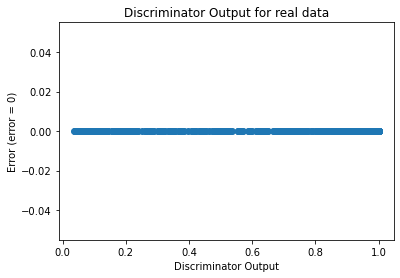

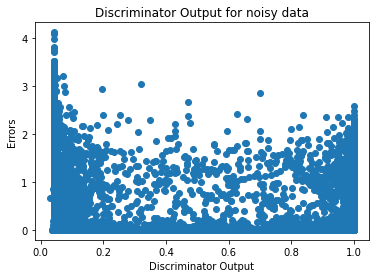

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)